### 1. Problem statement
 - The objective of this case study is to predict the price of avocado sold in the US using historical dataset.  
 - Data represents weekly 2018 retail scan data for National retail volume (units) and price.   
 - The data is as follows:  
   -  Date - The date of the observation
   -  Average Price - the average price of a single avocado
   -  type - conventional or organic
   -  year - the year
   -  Region - the city or region of the observation
   -  Total Volume - Total number of avocados sold
   -  4046 - Total number of avocados with PLU 4046 sold
   -  4225 - Total number of avocados with PLU 4225 sold
   -  4770 - Total number of avocados with PLU 4770 sold


### 2. Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

### 3. EDA

In [2]:
df = pd.read_csv('avocado.csv')
df = df[['Date', 'AveragePrice', 'Total Volume', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']]

In [3]:
df.head()

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


#### 3.1 Sort date by Date

In [4]:
df = df.sort_values('Date')

In [5]:
df.head()

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,374.35,186.67,187.68,0.0,organic,2015,Boise


#### 3.2 AveragePrice over Date

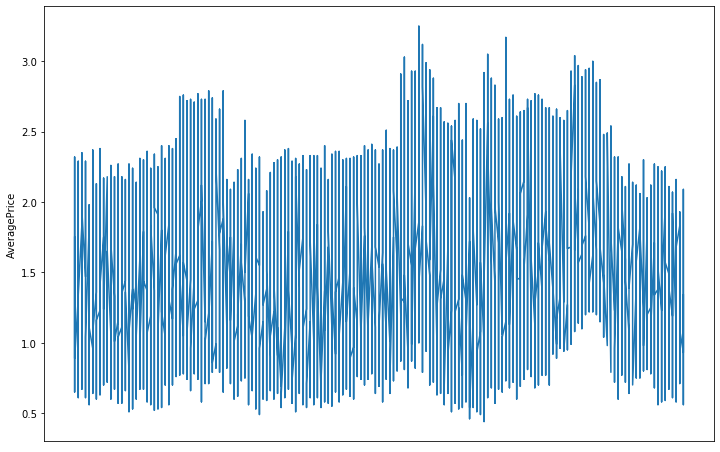

In [6]:
fig = plt.figure(figsize = (12, 8))
plt.plot(df['Date'], df['AveragePrice'])
# plt.xticks(rotation = 45)
plt.xlabel('Date')
plt.ylabel('AveragePrice')
plt.gca().axes.get_xaxis().set_visible(False)

#### 3.3 Year count ditribution

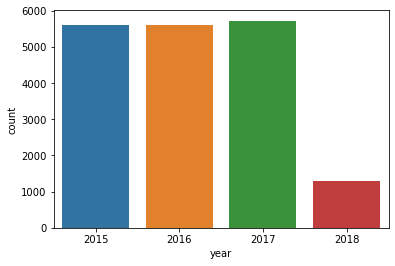

In [7]:
sns.countplot(x = df['year'], data = df)

### 4. Predict and evaluate

#### 4.1 Prepare data and fit model

In [8]:
df_prophet = df [['Date', 'AveragePrice']]
df_prophet = df_prophet.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'})

In [9]:
df_prophet.head()

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64


In [10]:
m = Prophet()
m.fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kx764qe\AppData\Local\Continuum\anaconda3\envs\courses\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


#### 4.2 Predict and Visualize

In [11]:
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [12]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.497917,0.874515,1.873953,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
1,2015-01-04,1.497917,0.886122,1.891580,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
2,2015-01-04,1.497917,0.866441,1.877304,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
3,2015-01-04,1.497917,0.873065,1.820872,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
4,2015-01-04,1.497917,0.896711,1.834092,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
5,2015-01-04,1.497917,0.926849,1.903184,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
6,2015-01-04,1.497917,0.897890,1.863350,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
7,2015-01-04,1.497917,0.902113,1.886151,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
8,2015-01-04,1.497917,0.900451,1.909952,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809
9,2015-01-04,1.497917,0.939534,1.867504,1.497917,1.497917,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,-0.113109,0.0,0.0,0.0,1.384809


##### model result visualization

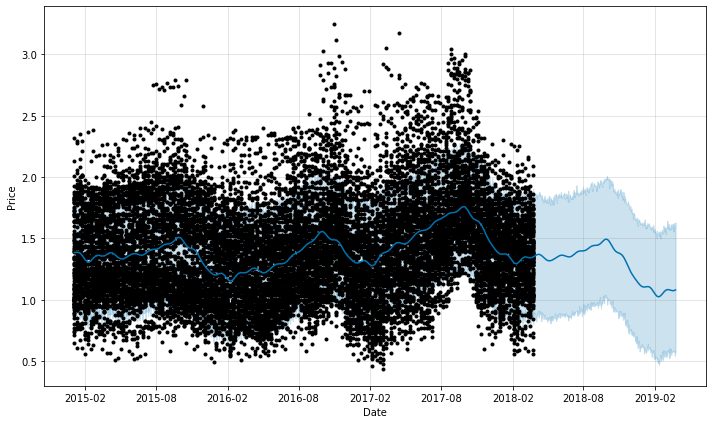

In [13]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')

##### model component visualization

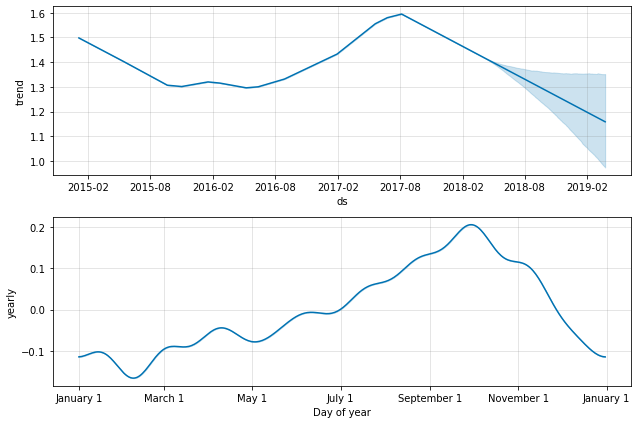

In [14]:
figure = m.plot_components(forecast)

### 4.3 Region prediction

#### 4.3.1 Prepare and visualize data

In [15]:
df_region = df[df['region'] == 'West']
df_region = df_region.sort_values('Date')

In [16]:
df_region.head()

,Date,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,2015-01-04,1.40,187548.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,2015-01-04,0.89,5794410.58,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,2015-01-11,1.39,223156.55,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,2015-01-11,0.95,5333097.71,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,2015-01-18,0.96,5475363.01,709208.62,527358.78,181809.88,39.96,conventional,2015,West


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


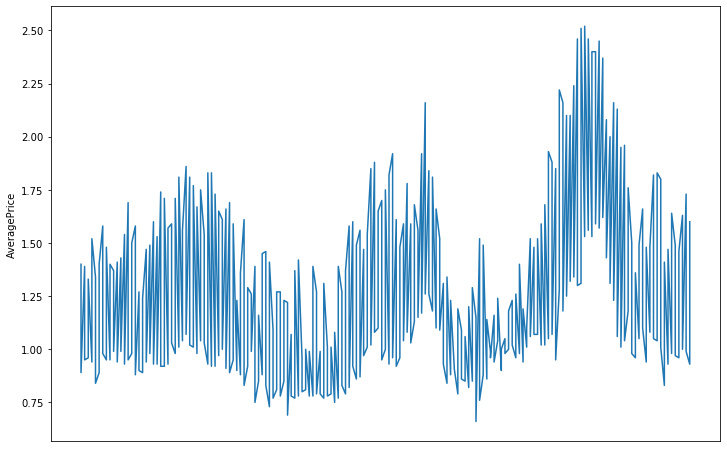

In [17]:
plt.figure(figsize = (12, 8))
plt.plot(df_region['Date'], df_region['AveragePrice'])
plt.xlabel('Date')
plt.ylabel('AveragePrice')
plt.gca().axes.get_xaxis().set_visible(False)

In [18]:
df_region_prophet = df_region[['Date', 'AveragePrice']]
df_region_prophet = df_region_prophet.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'})

#### 4.3.2 Predict and evaluate

In [19]:
m_region = Prophet()
m_region.fit(df_region_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\kx764qe\AppData\Local\Continuum\anaconda3\envs\courses\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [20]:
future = m_region.make_future_dataframe(periods = 365)
forecast = m_region.predict(future)

##### model result visualization

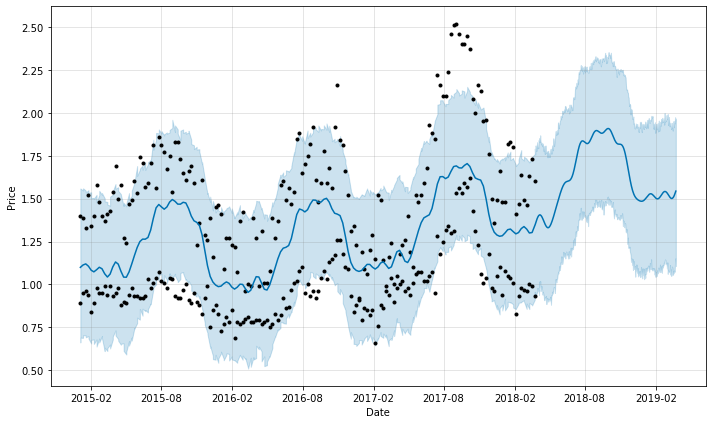

In [21]:
figure = m_region.plot(forecast, xlabel = 'Date', ylabel = 'Price')

##### model component visualization

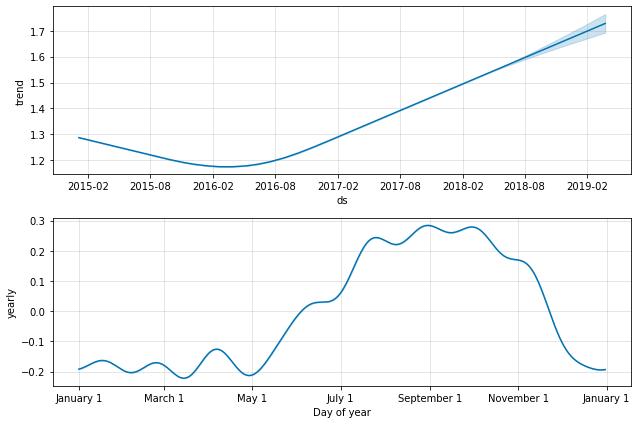

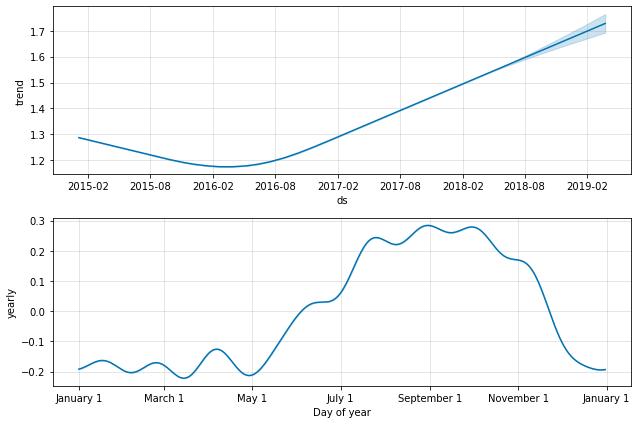

In [22]:
m_region.plot_components(forecast)